# Simulation results with r = 4 (order of interaction)

In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join as oj
from collections import defaultdict

from simulations_util import get_best_fit_line

In [2]:
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['figure.facecolor'] = 'white'
cs = {
    'SAPS': 'black',
    'CART': 'orange',
    'RF': "grey",
    "XGB" : "pink",
    "GAM" : "green"
}

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [9]:
# n_train = [100, 250, 500, 750, 1000, 1500]
n_train = np.ceil(np.geomspace(100, 2500, 8)).astype(int)

## 1. Results for LSS

In [10]:
sim_name = "LSS"
(scores, error_bar) = pkl.load(open(oj('results/', "LSS", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [11]:
best_fits

defaultdict(list,
            {'GAM': [[0.03776105908273129, -1.3356703967309693]],
             'CART': [[-0.17087161268198325, 0.12057549423628547]],
             'RF': [[-0.2050122768205153, -0.1423735137021714]],
             'SAPS': [[-1.0254665921767385, 4.869850080909991]],
             'XGB': [[-0.5046090296918595, 1.5274214207171433]]})

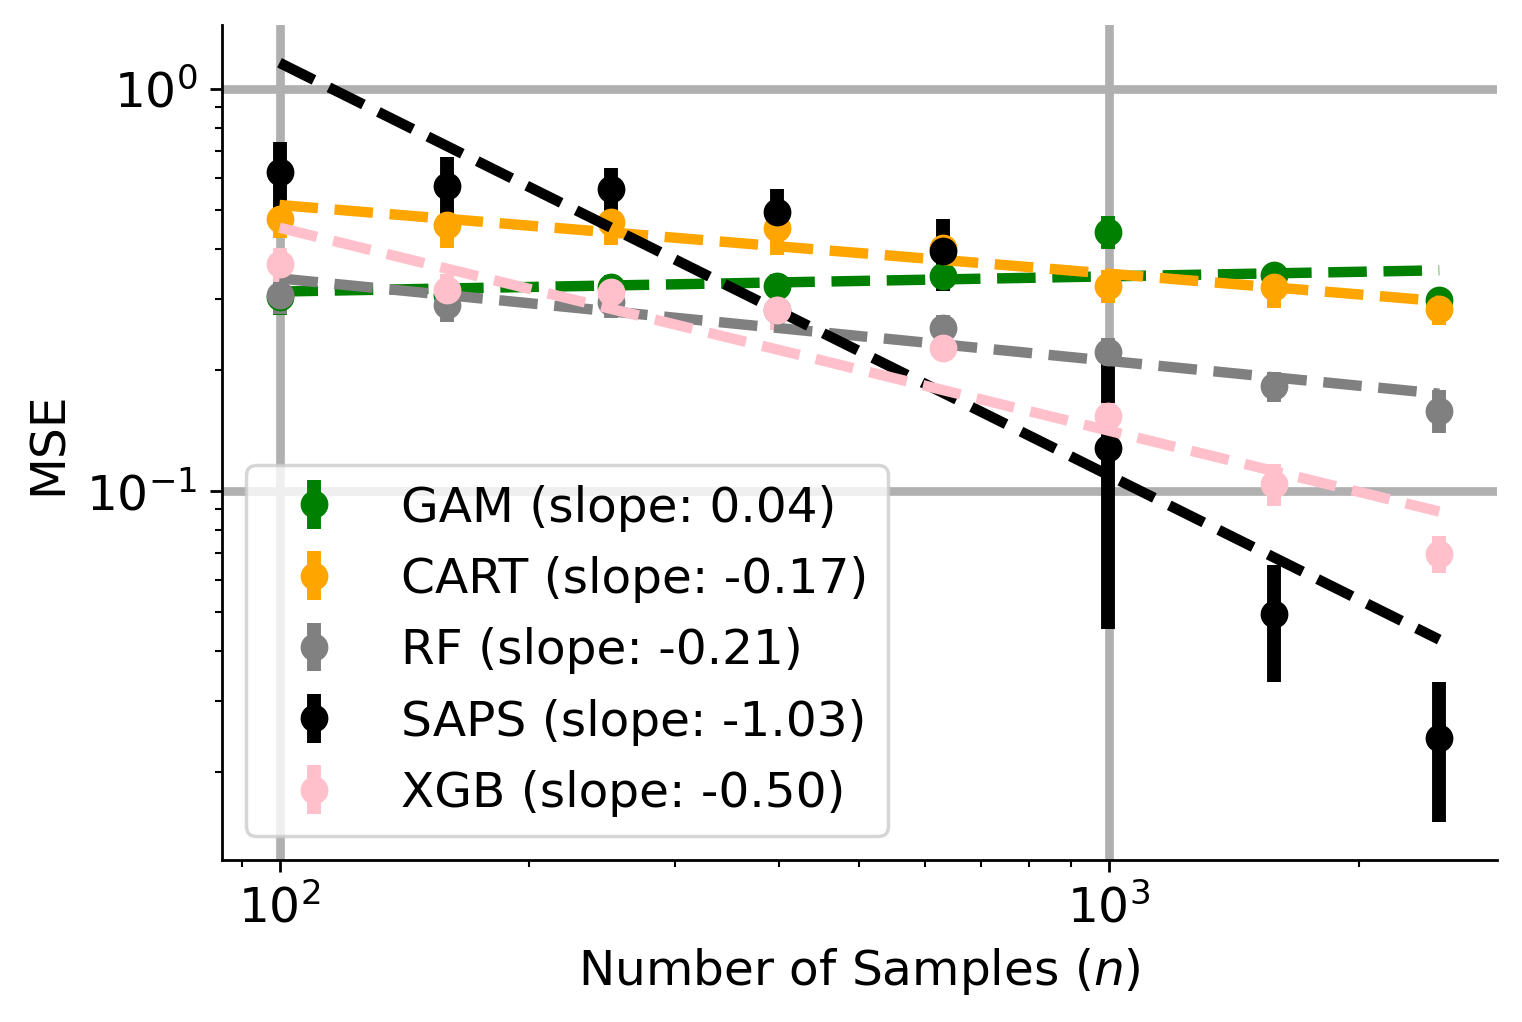

In [12]:
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    axs[0].errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)

for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.show()

## 2. Results for sum of polys

In [13]:
sim_name = "poly"
(scores, error_bar) = pkl.load(open(oj('results/', "poly", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [14]:
best_fits

defaultdict(list,
            {'GAM': [[-0.10075351665613987, -2.7368520027314767]],
             'CART': [[-0.0829255096231482, -2.3072058192918874]],
             'RF': [[-0.18151164315343826, -2.4383328219485327]],
             'SAPS': [[-0.43838058428316046, -0.42878096638059754]],
             'XGB': [[-0.37045315522969097, -1.320173173193528]]})

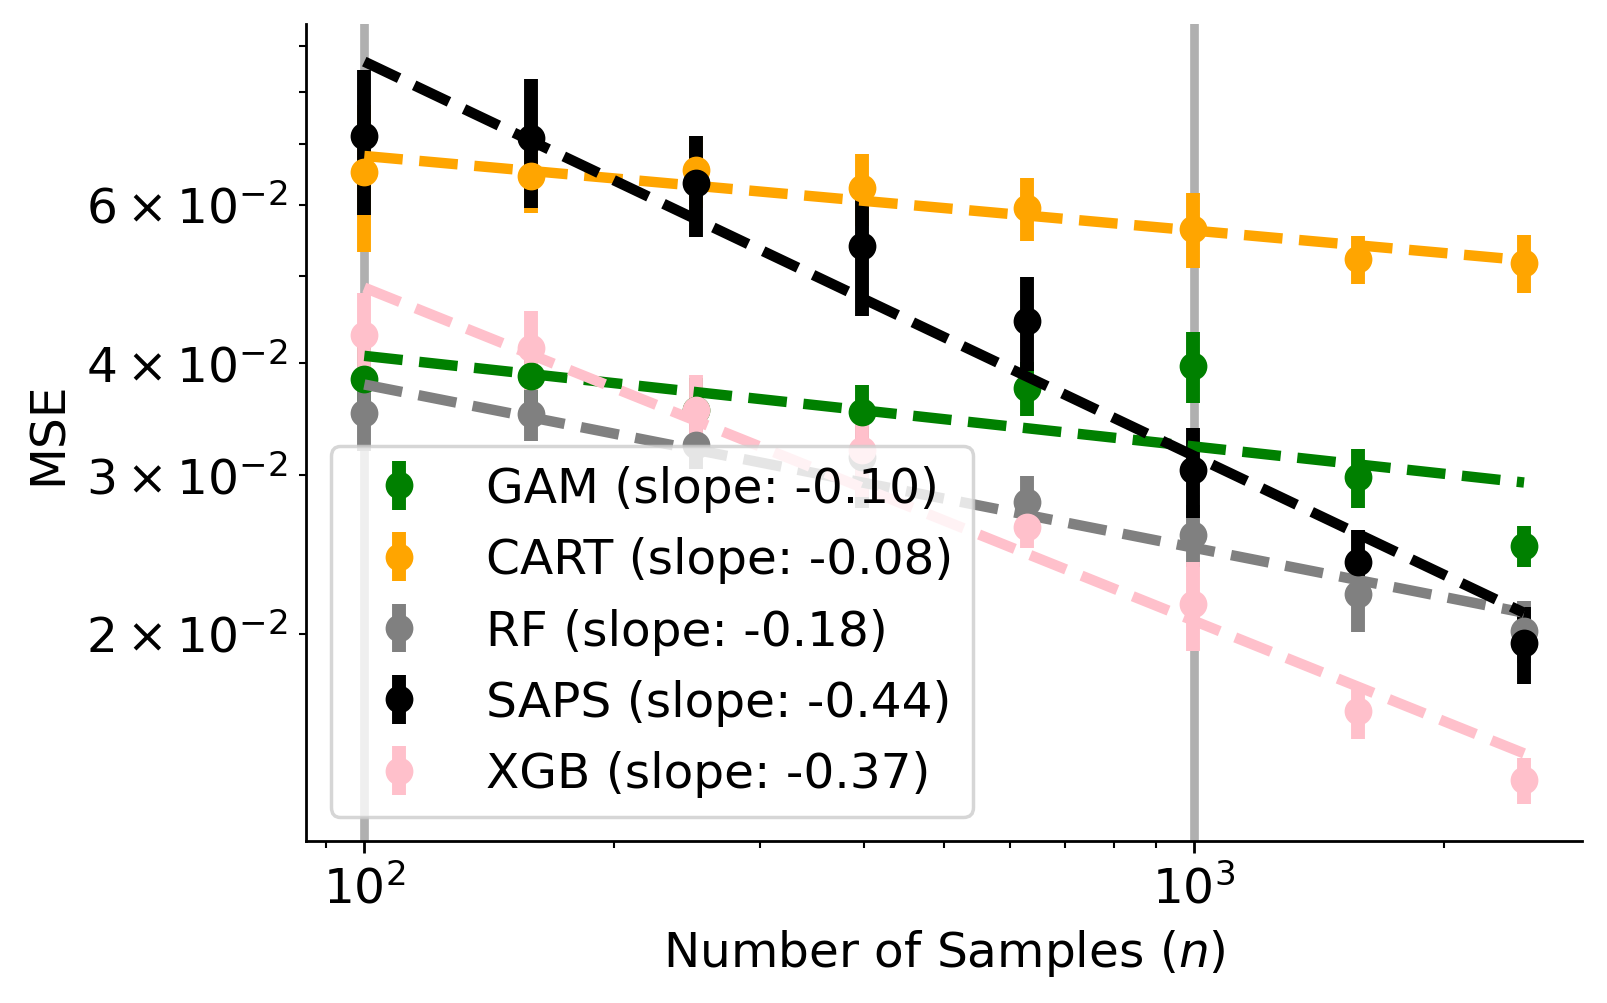

In [15]:
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    axs[0].errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)

for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.show()

## 3. Results for linear

In [16]:
sim_name = "linear"
(scores, error_bar) = pkl.load(open(oj('results/', sim_name, 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [17]:
best_fits

defaultdict(list,
            {'GAM': [[-2.1702459678892336, 11.411977154975034]],
             'CART': [[-0.07692919347119391, 1.144273420909683]],
             'RF': [[-0.16205500608871498, 0.9235487416968597]],
             'SAPS': [[-1.2579848049292082, 6.985631976428477]],
             'XGB': [[-0.35932685657041774, 2.037381968410532]]})

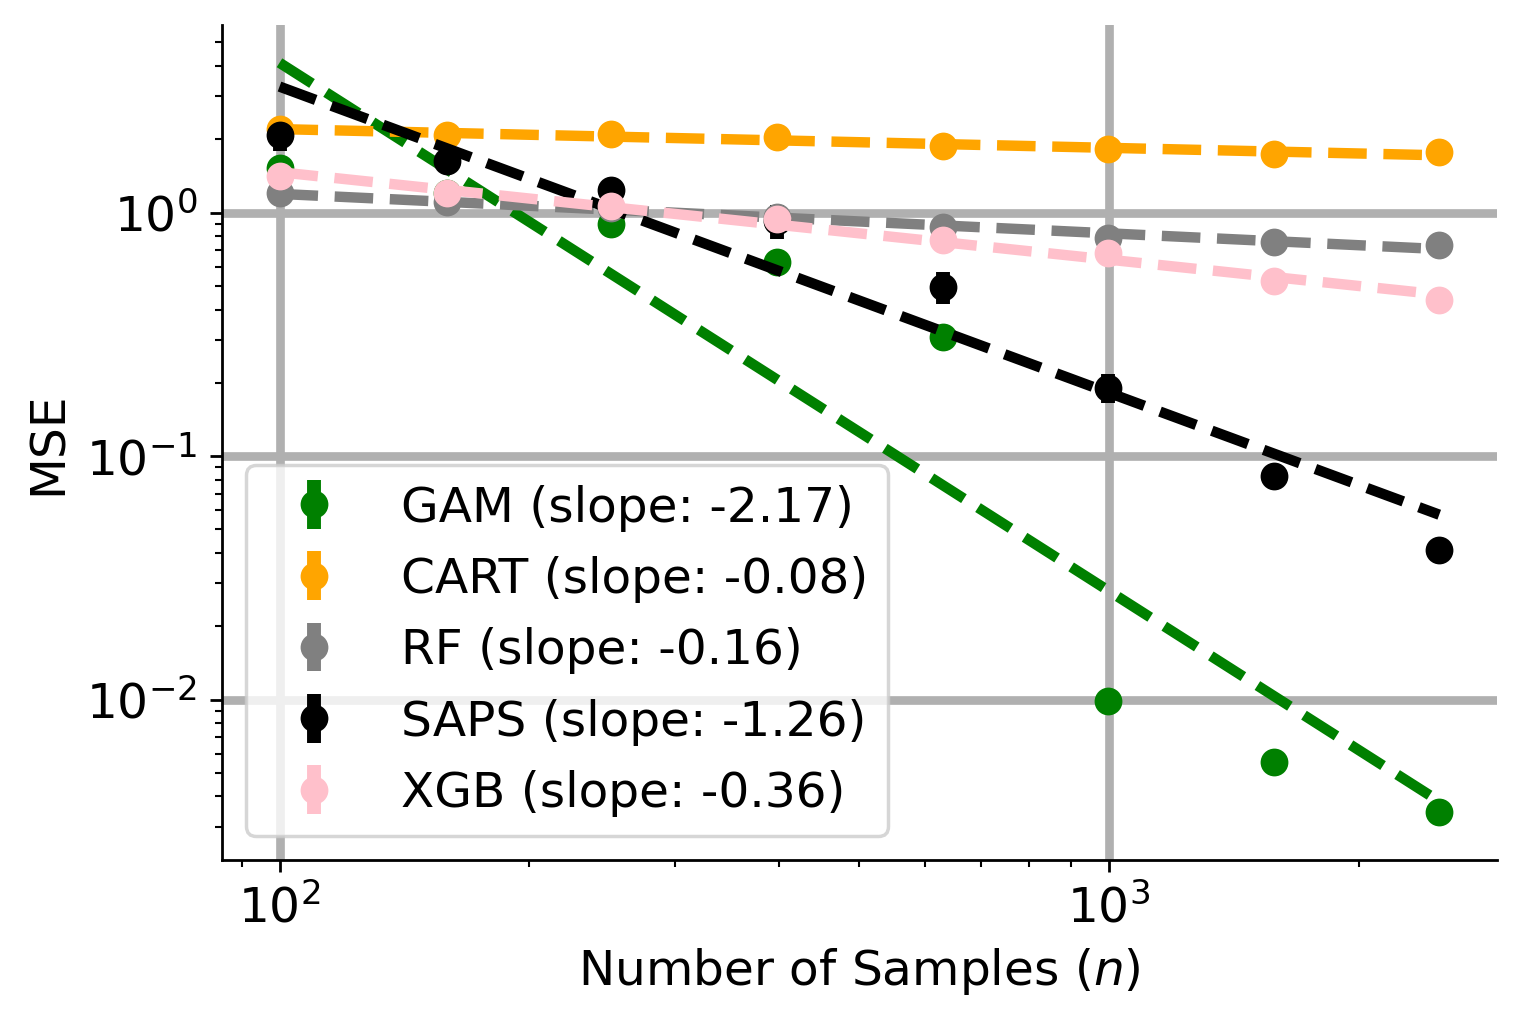

In [18]:
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
axs = [axs]

for i, k in enumerate(scores.keys()):
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    slope = best_fits[k][0][0]
    axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    axs[0].errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', label=k + f' (slope: {slope:.2f})', **kwargs)

for i in range(1):
    axs[i].legend(loc='best') #, labelcolor='linecolor')
    axs[i].set_xlabel('Number of Samples ($n$)') #, fontsize=25)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
#     axs[i].set_title(titles[i])
    axs[i].grid()
    axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
axs[0].set_ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.show()